In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data.csv')
df2 = df[:3]
df2

,ShearRate,Stress,Viscosity
0,0.10,0.003169,0.031690
1,0.20,0.005189,0.025945
2,0.35,0.008079,0.023083


In [4]:
reg = LinearRegression()
reg.fit(df2[['ShearRate']], df2.Stress)

LinearRegression()

In [5]:
# y = ax + b
a = reg.coef_[0] # slope (pente)
b = reg.intercept_ # intercept (ordonné à l'origine)
print(f'Slope: {a:.5f}', f'Intercept: {b:.5f}', sep='\n')

Slope: 0.01961
Intercept: 0.00123


In [6]:
from matplotlib import pyplot as plt

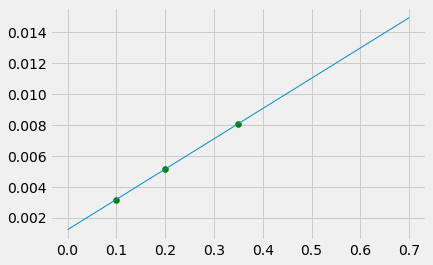

In [7]:
def line(x):
    return a * x + b

npline = np.vectorize(line)
x = np.linspace(0, 0.7, 20)

with plt.style.context('fivethirtyeight'):
    plt.scatter(df2.ShearRate, df2.Stress, color='green')
    plt.plot(x, npline(x), linewidth=1)

In [8]:
Y = df2.Stress
X1 = df2.ShearRate
X = np.transpose(np.vstack((X1, np.ones(X1.shape))))
Xt = np.transpose(X)
A = np.dot(Xt, X)
Ai = np.linalg.inv(A)

In [9]:
np.dot(Ai, np.dot(Xt, Y))

array([0.01961053, 0.00123005])

In [12]:
df3 = df2
df3.rename(columns={ 'ShearRate': 'x', 'Stress': 'y' })

,x,Stress,Viscosity
0,0.10,0.003169,0.031690
1,0.20,0.005189,0.025945
2,0.35,0.008079,0.023083
